# Gold Price Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Data Collection

In [2]:
df  = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/gold.csv')
df.shape

(1718, 81)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


## Data Preprocessing

In [6]:
# Handling missing values
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [7]:
# Handling Duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
# Handling Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Date']


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

df.drop(columns=['Date'], inplace=True)


In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Year,Month,Day,DayOfWeek
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,2011,12,15,3
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,2011,12,16,4
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,2011,12,19,0
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,2011,12,20,1
4,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,2011,12,21,2


In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler

numerical_cols_for_scaling = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_scaling.remove('Close')  # target column

scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])

print("Columns after processing:", df.columns.tolist())
display(df.head())

Columns after processing: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume', 'Year', 'Month', 'Da

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Year,Month,Day,DayOfWeek
0,1.564704,1.537256,1.433596,152.330002,1.426632,2.658016,-1.859004,-1.869181,-1.868930,-1.880786,...,1.293922,1.275157,1.244018,1.226738,1.226738,-0.419380,-1.988268,1.592039,-0.075423,0.695727
1,1.540163,1.561084,1.559519,155.229996,1.592051,1.967348,-1.877261,-1.874868,-1.884753,-1.894268,...,1.230917,1.236814,1.215876,1.238987,1.238987,-0.421786,-1.988268,1.592039,0.039552,1.410167
2,1.606936,1.588884,1.585969,154.869995,1.571516,0.833630,-1.881141,-1.889198,-1.913878,-1.923972,...,1.249293,1.232457,1.233465,1.232862,1.232862,-0.749384,-1.988268,1.592039,0.384477,-1.447594
3,1.683413,1.677956,1.713618,156.979996,1.691874,0.140258,-1.878402,-1.847799,-1.906081,-1.840800,...,1.328924,1.333544,1.346915,1.351853,1.351853,-0.582849,-1.988268,1.592039,0.499452,-0.733154
4,1.692543,1.683630,1.687744,157.160004,1.702141,0.721601,-1.838465,-1.842794,-1.851501,-1.835316,...,1.361301,1.388444,1.373298,1.399974,1.399974,-0.539276,-1.988268,1.592039,0.614428,-0.018714


## Training and Evaluation

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Close'])
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [18]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "R2 Score": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, rf_pred),
        r2_score(y_test, xgb_pred)
    ],
    "MAE": [
        mean_absolute_error(y_test, lr_pred),
        mean_absolute_error(y_test, rf_pred),
        mean_absolute_error(y_test, xgb_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, lr_pred)),
        np.sqrt(mean_squared_error(y_test, rf_pred)),
        np.sqrt(mean_squared_error(y_test, xgb_pred))
    ]
})

results


,Model,R2 Score,MAE,RMSE
0,Linear Regression,1.000000,2.007696e-14,2.775287e-14
1,Random Forest,0.999709,7.712570e-02,3.010678e-01
2,XGBoost,0.999499,1.517690e-01,3.953388e-01


## Plots and Analysis

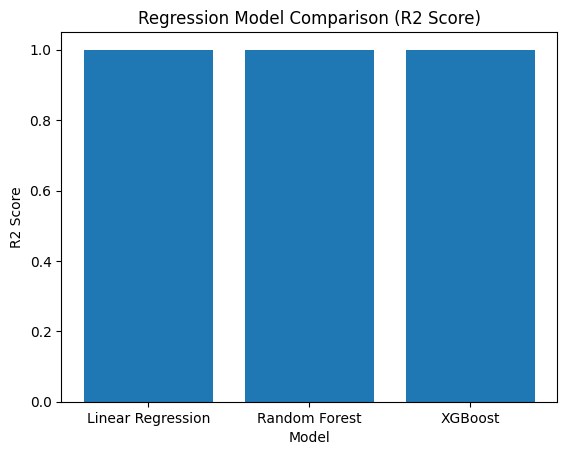

In [20]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results["Model"], results["R2 Score"])
plt.title("Regression Model Comparison (R2 Score)")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.show()


Thanks!